## Why Not More Testing? The Effects of False Positives

The US government has been widely criticized for its failure to test as many of its citizend for COVID-19 infections as other countries. But is there a good explaination for the lack of testing?

In [1]:
import sys
# Install required packages
#!{sys.executable} -mpip -q install matplotlib seaborn statsmodels pandas publicdata metapack

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import metapack as mp
import rowgenerators as rg
import publicdata as pub
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

As the world became more aware of the threat posed by COVID-19 in February 2020, US media began to draw attention to the disparity between the extent of testing being done in other countries versus the United States. The CDC released [fairly restrictive guidelines](https://www.cdc.gov/coronavirus/2019-ncov/hcp/clinical-criteria.html) for what conditions qualified a patient for a lab test for COVID-19 infections, and many media outlet criticized the US for being unprepared to test for the virus. 

Criticism intensified when the first versoin of tests created by the CDC [proved to be unreliable](https://www.forbes.com/sites/rachelsandler/2020/03/02/how-the-cdc-botched-its-initial-coronavirus-response-with-faulty-tests/#5bbf1d50670e). But there are important considerations that these reports have largely ignored, the most important of which is the false positive and false negative rate of the tests, which can produce results that are worse than useless when the  prevalence of the condition -- the percentage of people who are infected -- is very low. 


Every test -- nearly any sort of test -- has an error rate: false positives and false negatives. False negatives are fairly easy to understand. If a 1,000 women who have breast cancer take a test that has a false positive rate of 1%, the test will report that 999 of them have cancer, and 1 who does not, even though she actually does.

The false positive rate is much trickier, because it is multipled not by the number of women who have cancer, but by the number of women who take the test. If the situation is that a large number of women are tested, but few have cancer, the test can report many more false positives than women who actually have cancer. 

There is substantial evidence that the tests for the COVID-19 virus had a high false positive rate, which would mean that if a large number of people are tested when the prevalence of COVID-19 infections are small, most of the reported positives are false positives. 



# Primer on False Positives and Negatives

Research related to epidemiological tests typically does not report the false positive rate; instead it reports two parameters, the Selectivity and Specificity. [Wikipedia has an excellent article](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) describing these parameters and how they related to false positive and false negative rates.  The most important part of the Wikipedia article to understand is the table in the [worked example](https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Worked_example). When a test is administered, there are four possible outcomes. The test can return a positive result, which can be a true positive or a false positive, or it can return a negative result, which is a true negative or a false negative. If you organize those posibilities by what is the true condition ( does the patient have the vius or not ):

* Patient has virus
 * True Positive ($\mathit{TP}$)
 * False negative ($\mathit{FN}$)
* Patient does not have virus
 * True Negative ($\mathit{TN}$)
 * False Positive.  ($\mathit{FP}$)

In the Wikipedia worked example table:

* The number of people who do have the virus is  $\mathit{TP}+\mathit{FN}$, the true positives plus the false negatives, which are the cases that should have been reported positive, but were not. 
* The number or of people who do not have the virus is $\mathit{TN}+\mathit{FP}$, the true negatives and the false positives, which are the cases should have been reported positive, but were not. 

The values of Sensitivity and Specificity are defined as: 

$$\begin{array}{ll}
Sn = \frac{\mathit{TP}}{\mathit{TP} + \mathit{FN}} & \text{True positives outcomes divided by all positive conditions} \tag{1}\label{eq1}\\ 
Sp = \frac{\mathit{TN}}{\mathit{FP} + \mathit{TN}} & \text{True negatives outcomes divided by all negative conditions}\\ 
\end{array}$$

We want to know the number of false positives($\mathit{FP}$) given the number of positive conditions ($\mathit{TP}+\mathit{FN}$) and the total number of tests. To compute these, we need to have some more information about the number of people tested, and how common the disease is: 

* Total test population $P$, the number of people being tested, which equals $\mathit{TP}+\mathit{FP}+\mathit{FN}+\mathit{TN}$
* The prevalence $p$, the population rate of positive condition. 

We can do a little math to get: 

$$\begin{array}{ll}
\mathit{TP} = Pp\mathit{Sn} & \text{}\\ 
\mathit{FP} = P(1-p)(1-\mathit{Sp}) \text{}\\ 
\mathit{TN} = P(1-p)\mathit{Sp} & \text{}\\ 
\mathit{FN} = Pp(1-\mathit{Sn})& \text{}\\ 
\end{array}$$

You can see examples of these equations worked out in the third line in the red and green cells of the [Worked Example](https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Worked_example) on the Sensitivity and Specificity Wikipedia page. 

It is important to note that when these four values are used to calculate $\mathit{Sp}$ and $\mathit{Sn}$, the population value $P$ cancels out, so $\mathit{Sp}$ and $\mathit{Sn}$ do not depend on the number of people tested. 



One of the interesting questions when test results are reported is "What percentage of the positive results are true positives?" This is a particularly important question for the COVID-19 pandemic because there are a lot of reports that most people with the virus are asymptomatic. Are they really asymptomatic, or just false positives?

The metric we're interested here is the portion of positive results that are true positives, the positive predictive value, $\mathit{PPV}$:

$$\mathit{PPV} = \frac{\mathit{TP} }{ \mathit{TP} +\mathit{FP}  } $$

Which expands to:

$$\mathit{PPV} = \frac{p\mathit{Sn} }{ p\mathit{Sn} + (1-p)(1-\mathit{Sp})  }\tag{2}\label{eq2} $$

It is important to note that $\mathit{PPV}$ is not dependent on $P$, the size of the population being tested. It depends only on the quality parameters of the test, $\mathit{Sn}$ and $\mathit{Sp}$, and the prevalence, $p$. For a given test, only the prevalence will change over time. 

# Selctivity and Specificity Values

It has been dificult to find specificity and sensitivity values for COVID-19 tests, or any rt-PCR tests; reserch papers rarely publish the values. Howver, there are a few reports for the values for serology tests, and a few reports of values for rt-PRC tests for the MERS-CoV virus. 

we'll use the Specificity and Selectivity parameters from a recently published paper, _Development and Clinical Application of A Rapid IgM-IgG Combined Antibody Test for SARS-CoV-2 Infection Diagnosis_<sup>[2](#fnote2)</sup>, which reports: 

> The overall testing sensitivity was 88.66% and specificity was 90.63%

This test is significantly different from the most common early tests for COVID-19; this test looks for antibodies in the patient's blood, while most early COVID-19 tests look for fragment of DNA from the virus. 

The article _MERS-CoV diagnosis: An update._<sup>[4](#fnote4)</sup> reports that for MERS-CoV:

> Song et al. developed a rapid immunochromatographic assay for the detection of MERS-CoV nucleocapsid protein from camel nasal swabs with 93.9% sensitivity and 100% specificity compared to RT-rtPCR

The article _Performance Evaluation of the PowerChek MERS (upE & ORF1a) Real-Time PCR Kit for the Detection of Middle East Respiratory Syndrome Coronavirus RNA_<sup>[5](#fnote5)</sup> reports:

> The diagnostic sensitivity and specificity of the PowerChek MERS assay were both 100% (95% confidence interval, 91.1–100%).

The [Emergency Use Authorization for LabCorp's rt-PCR test](https://www.fda.gov/media/136151/download)<sup>[6](#fnote6)</sup> reports:

~~~
Performance of the COVID-19 RT-PCR test against the expected results [ with NP swabs ] are:
Positive Percent Agreement 40/40 = 100% (95% CI: 91.24%-100%)
Negative Percent Agreement 50/50 = 100% (95% CI: 92.87% -100%)
~~~

Using the lower bound of the 95% CI,  values convert to a specificity of .90  and sensitivity of .94.

Based on these values, we'll explore the effects of sensitivity and specificities in the range of .9 to 1. 


# PPV For Serology Test

First we'll look at the positive prediction value for the antibody test in reference ([2](#fnote2)), which has the lowest published Sp and Sn values at .9063 and .8866. The plot below shows the portion of positive test results that are true positives s a function of the prevalence. 


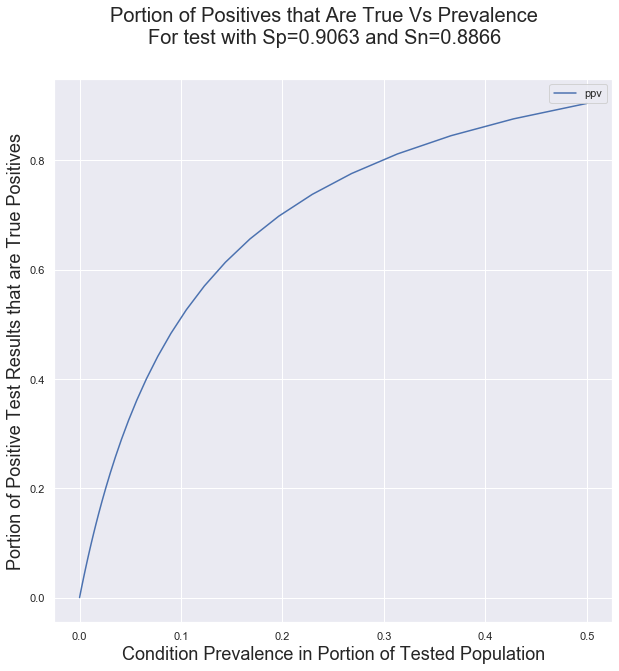

In [2]:
def p_vs_tpr(Sp, Sn):

    for p in np.power(10,np.linspace(-7,np.log10(.5), num=100)): # range from 1 per 10m to 50%
        ppv = (p*Sn) / ( (p*Sn)+(1-p)*(1-Sp))
        yield (p, ppv)

def plot_ppv(Sp, Sn):

    df = pd.DataFrame(list(p_vs_tpr(Sp, Sn)), columns='p ppv'.split())
    df.head()

    fig, ax = plt.subplots(figsize=(12,8))

    df.plot(ax=ax, x='p',y='ppv', figsize=(10,10))

    fig.suptitle(f'Portion of Positives that Are True Vs Prevalence\nFor test with Sp={Sp} and Sn={Sn}', fontsize=20)

    ax.set_xlabel('Condition Prevalence in Portion of Tested Population', fontsize=18)
    ax.set_ylabel('Portion of Positive Test Results that are True Positives', fontsize=18);


    #ax.set_xscale('log')
    #ax.set_yscale('log')
    
    
plot_ppv(Sp = .9063, Sn = .8866)


The important implication of this curve is that using a test with low Sp and Sn values in conditions of low prevalence will result in a very large portion of false positives.

# False Positives for LabCorp's test

Although the published results for the LabCorp test are 100% true positives and true negative rates, the 95% error margin is substantial, because the test was validatd with a relatively small number of samples. This analysis will use the published error margins to produce a distribution of positive prediction values. First, let's look at the distributions of the true positive and true negative rates, accounting for the published confidence intervals. 


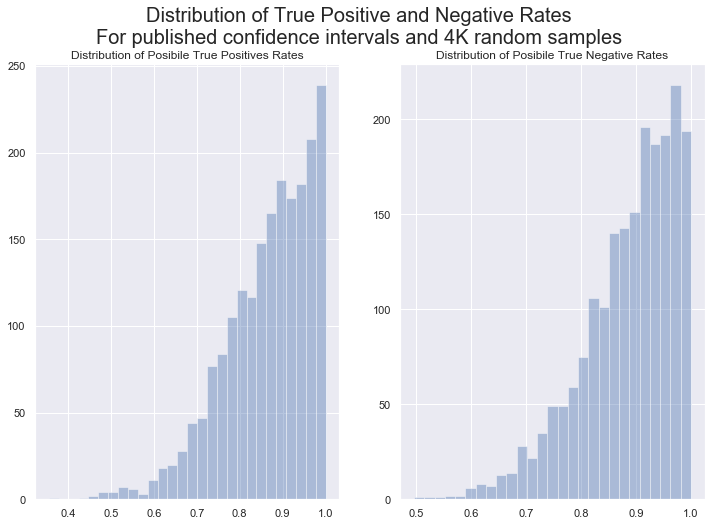

In [3]:
# Convert CI to standard error
p_se = (1-.9124) * 1.96
n_se = (1-.9287) * 1.96


def select_v(se):
    """get a distribution value, which must be less than or equal to 1"""
    while True:
        v = np.random.normal(1, se)
        if v <= 1:
            return v
    
# These values are not TP and FP counts; they are normalized to 
# prevalence
TP = np.array(list(select_v(p_se) for _ in range(2000)))
TN = np.array(list(select_v(n_se) for _ in range(2000)))

fig, ax = plt.subplots(1,2, figsize=(12,8))
sns.distplot( TP, ax=ax[0], kde=False);

ax[0].set_title('Distribution of Posibile True Positives Rates');

sns.distplot( TN, ax=ax[1], kde=False);

ax[1].set_title('Distribution of Posibile True Negative Rates');

fig.suptitle(f'Distribution of True Positive and Negative Rates'
             '\nFor published confidence intervals and 4K random samples', fontsize=20);


From these distributions, we can calculate the distributions for the positive prediction value, the portion of all positive results that are true positives. 

With these distributions, we can use ([Eq 2](#MathJax-Span-5239)) to compute the distributions of PPV for a variety of prevalences. In each chart, the 'mean' is the expectation value of the distribution, the weighted mean of the values. It is the most likely PPV valule for the given prevalence. 

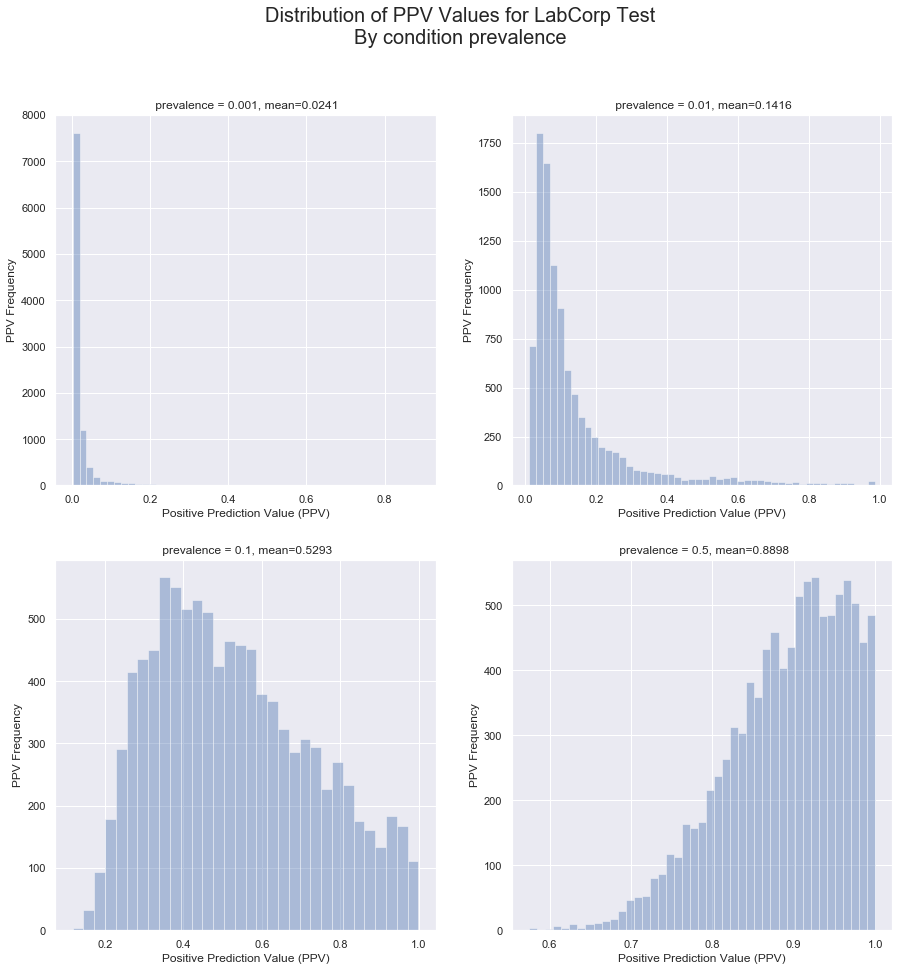

In [9]:
FP = 1-TN
FN = 1-TP

Sn = TP / (TP+FN)
Sp = TN / (TN+FP)

def ppv_dist_ufunc(p, Sp, Sn):
    return (p*Sn) / ( (p*Sn)+(1-p)*(1-Sp))

def ppv_dist(p, Sp, Sn):
    sp = np.random.choice(Sp, 10000, replace=True)
    sn = np.random.choice(Sn, 10000, replace=True)
    
    return ppv_dist_ufunc(p,sp, sn)
    
fig, axes = plt.subplots( 2,2, figsize=(15,15))
axes = axes.flat

def plot_axis(axn, prevalence):
    ppvd = ppv_dist(prevalence, Sp, Sn)
    wmean = (ppvd.sum()/len(ppvd)).round(4)
    sns.distplot( ppvd, ax=axes[axn], kde=False);
    axes[axn].set_title(f' prevalence = {prevalence}, mean={wmean}');
    axes[axn].set_xlabel('Positive Prediction Value (PPV)')
    axes[axn].set_ylabel('PPV Frequency')

plot_axis(0, .001)
plot_axis(1, .01)
plot_axis(2, .10)
plot_axis(3, .5)
    
fig.suptitle(f'Distribution of PPV Values for LabCorp Test\nBy condition prevalence', fontsize=20);




The implication of these charts is that, even for a test with published true positive and true negative rate of 100%, the uncertainties in the measurements can mean that there still a substantial problem of false positives for low prevalences. 

Computing the mean PPV value or a range of prevalence values results in the following relationship.

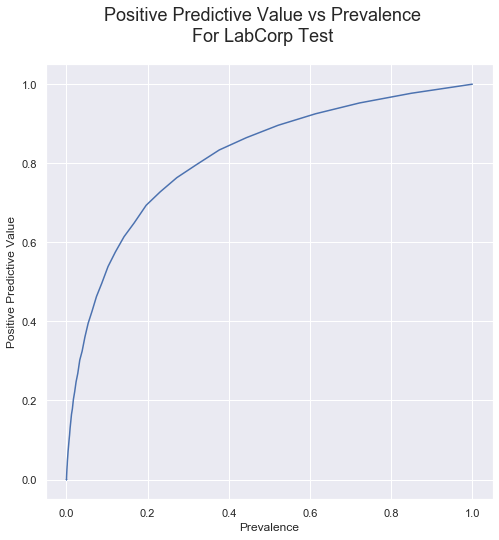

In [26]:
def ppv_vs_p():
    for p in np.power(10,np.linspace(-7,np.log10(1), num=100)): # range from 1 per 10m to 50%
        ppvd = ppv_dist(p, Sp, Sn)
        yield p, ppvd.sum()/len(ppvd)
        
ppv_v_p = pd.DataFrame(list(ppv_vs_p()), columns='p ppv'.split())

fig, ax = plt.subplots(figsize=(8,8))

sns.lineplot(x='p', y='ppv', data=ppv_v_p, ax=ax)
ax.set_xlabel('Prevalence')
ax.set_ylabel('Positive Predictive Value')

fig.suptitle("Positive Predictive Value vs Prevalence\nFor LabCorp Test", fontsize=18);

Compare this cure to the one presented earlier, for the antibody test with published sensitivity of 88.66% and specificity of 90.63%; The relationship for the rt-PCR test isn't much better. 


# Conclusion

Tests with less than 100% specificity and selectivity, including those with published values of 100% but with a moderate confidence interval, are very sensitive to low condition prevalences. Considering the confidence intervals, to ensure that 50% of positive results are true positives requires a prevalence of about 10%, and 80% PPV requires about a 30% prevalence. This suggests that using rt-PCR tests to test a large population that has a low prevalence is likely to produce a large number of false positive results. 

# References 

* <a name="fnote1">1</a> Parikh, Rajul et al. “[Understanding and using sensitivity, specificity and predictive values.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2636062/)” Indian journal of ophthalmology vol. 56,1 (2008): 45-50. doi:10.4103/0301-4738.37595
* <a name="fnote2">2</a> Li, Zhengtu et al. “[Development and Clinical Application of A Rapid IgM-IgG Combined Antibody Test for SARS-CoV-2 Infection Diagnosis.](https://pubmed.ncbi.nlm.nih.gov/32104917/)” Journal of medical virology, 10.1002/jmv.25727. 27 Feb. 2020, doi:10.1002/jmv.25727
* <a name="fnote3">3</a> Zhuang, G H et al. “[Potential False-Positive Rate Among the 'Asymptomatic Infected Individuals' in Close Contacts of COVID-19 Patients](https://pubmed.ncbi.nlm.nih.gov/32133832)” Zhonghua liuxingbingxue zazhi, vol. 41,4 485-488. 5 Mar. 2020, doi:10.3760/cma.j.cn112338-20200221-00144
* <a name="fnote4">4</a> Al Johani, Sameera, and Ali H Hajeer. “[MERS-CoV diagnosis: An update.](https://www.sciencedirect.com/science/article/pii/S1876034116300223)” Journal of infection and public health vol. 9,3 (2016): 216-9. doi:10.1016/j.jiph.2016.04.005
* <a name="fnote5">5</a> Huh, Hee Jae et al. “[Performance Evaluation of the PowerChek MERS (upE & ORF1a) Real-Time PCR Kit for the Detection of Middle East Respiratory Syndrome Coronavirus RNA.](http://www.annlabmed.org/journal/view.html?volume=37&number=6&spage=494)” Annals of laboratory medicine vol. 37,6 (2017): 494-498. doi:10.3343/alm.2017.37.6.494
* <a name="fnote6">6</a> [Emergency Use Authorization summary](https://www.fda.gov/media/136151/download) for LabCorp's COVID-19 rt-PCR test. 


The World Health Organization has a [web page with links to information the COVID-19 tests](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/technical-guidance/laboratory-guidance) from many countries. 




